# EXPLORATORY DATA ANALYSIS ON CREDIT CARD DEFAULT PAYMENT

### DATASET: [UCI MACHIE LEARNING REPOSITORY](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

## IMPORTING DATASET

In [52]:
pip install ucimlrepo

In [53]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

# metadata
print(default_of_credit_card_clients.metadata)

# variable information
print(default_of_credit_card_clients.variables)

{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

## IMPORTING NECESSARY LIBRARIES

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DESCRIPTIVE STATISTICS OF THE DATASET

In [55]:
X.dtypes

,0
X1,int64
X2,int64
X3,int64
X4,int64
X5,int64
X6,int64
X7,int64
X8,int64
X9,int64
X10,int64


In [56]:
y.dtypes

,0
Y,int64


In [57]:
X.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [58]:
print(y.value_counts)

<bound method DataFrame.value_counts of        Y
0      1
1      1
2      0
3      0
4      0
...   ..
29995  0
29996  0
29997  1
29998  1
29999  1

[30000 rows x 1 columns]>


In [59]:
print(X.isnull().sum())
print(y.isnull().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64
Y    0
dtype: int64


## TARGET VARIABLE ANALYSIS

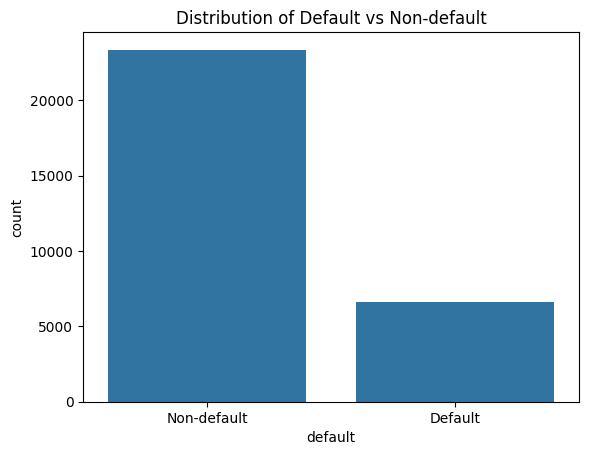

In [60]:
df = X.copy()
df['default'] = y  # add target column

sns.countplot(x='default', data=df)
plt.title("Distribution of Default vs Non-default")
plt.xticks([0, 1], ['Non-default', 'Default'])
plt.show()

## IDENTIFYING OUTLIERS

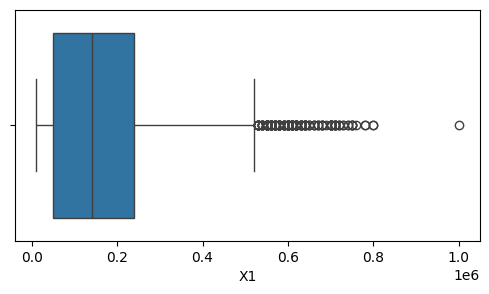

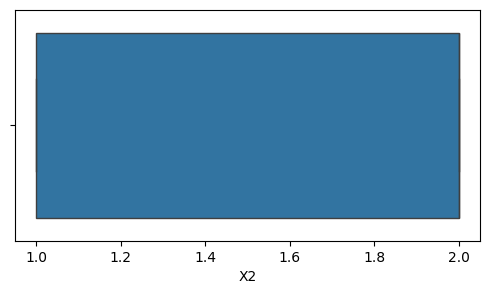

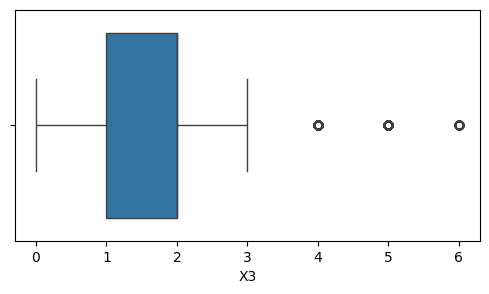

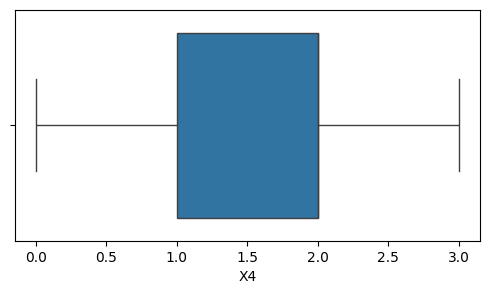

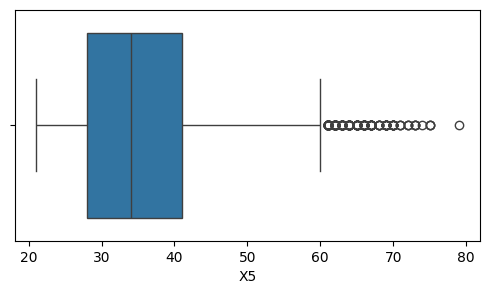

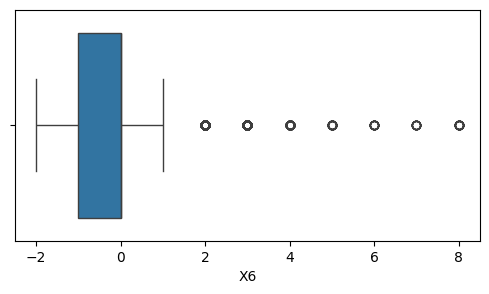

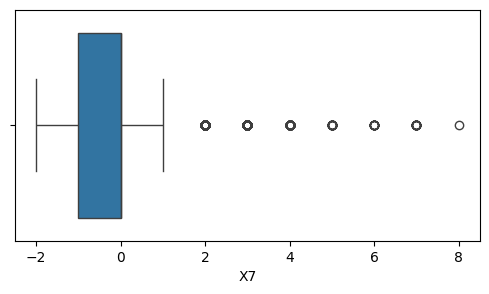

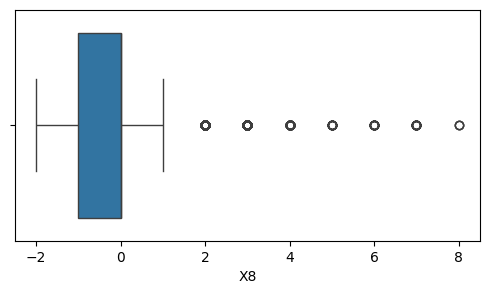

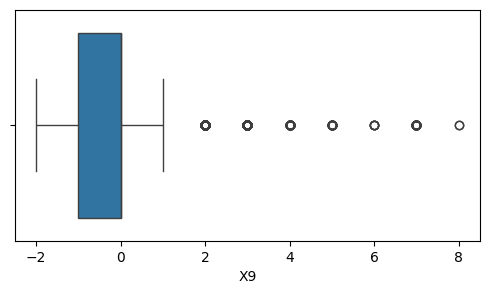

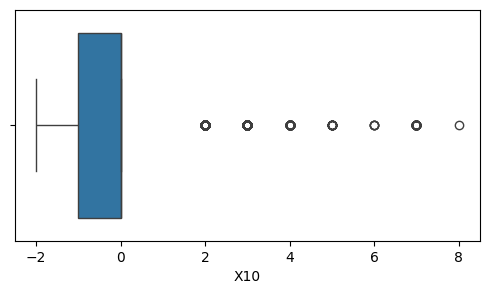

In [61]:
for col in df.columns[:10]:
  plt.figure(figsize=(6,3))
  sns.boxplot(x=df[col])
  plt.show()

## ANALYSING NUMERICAL VARIABLES

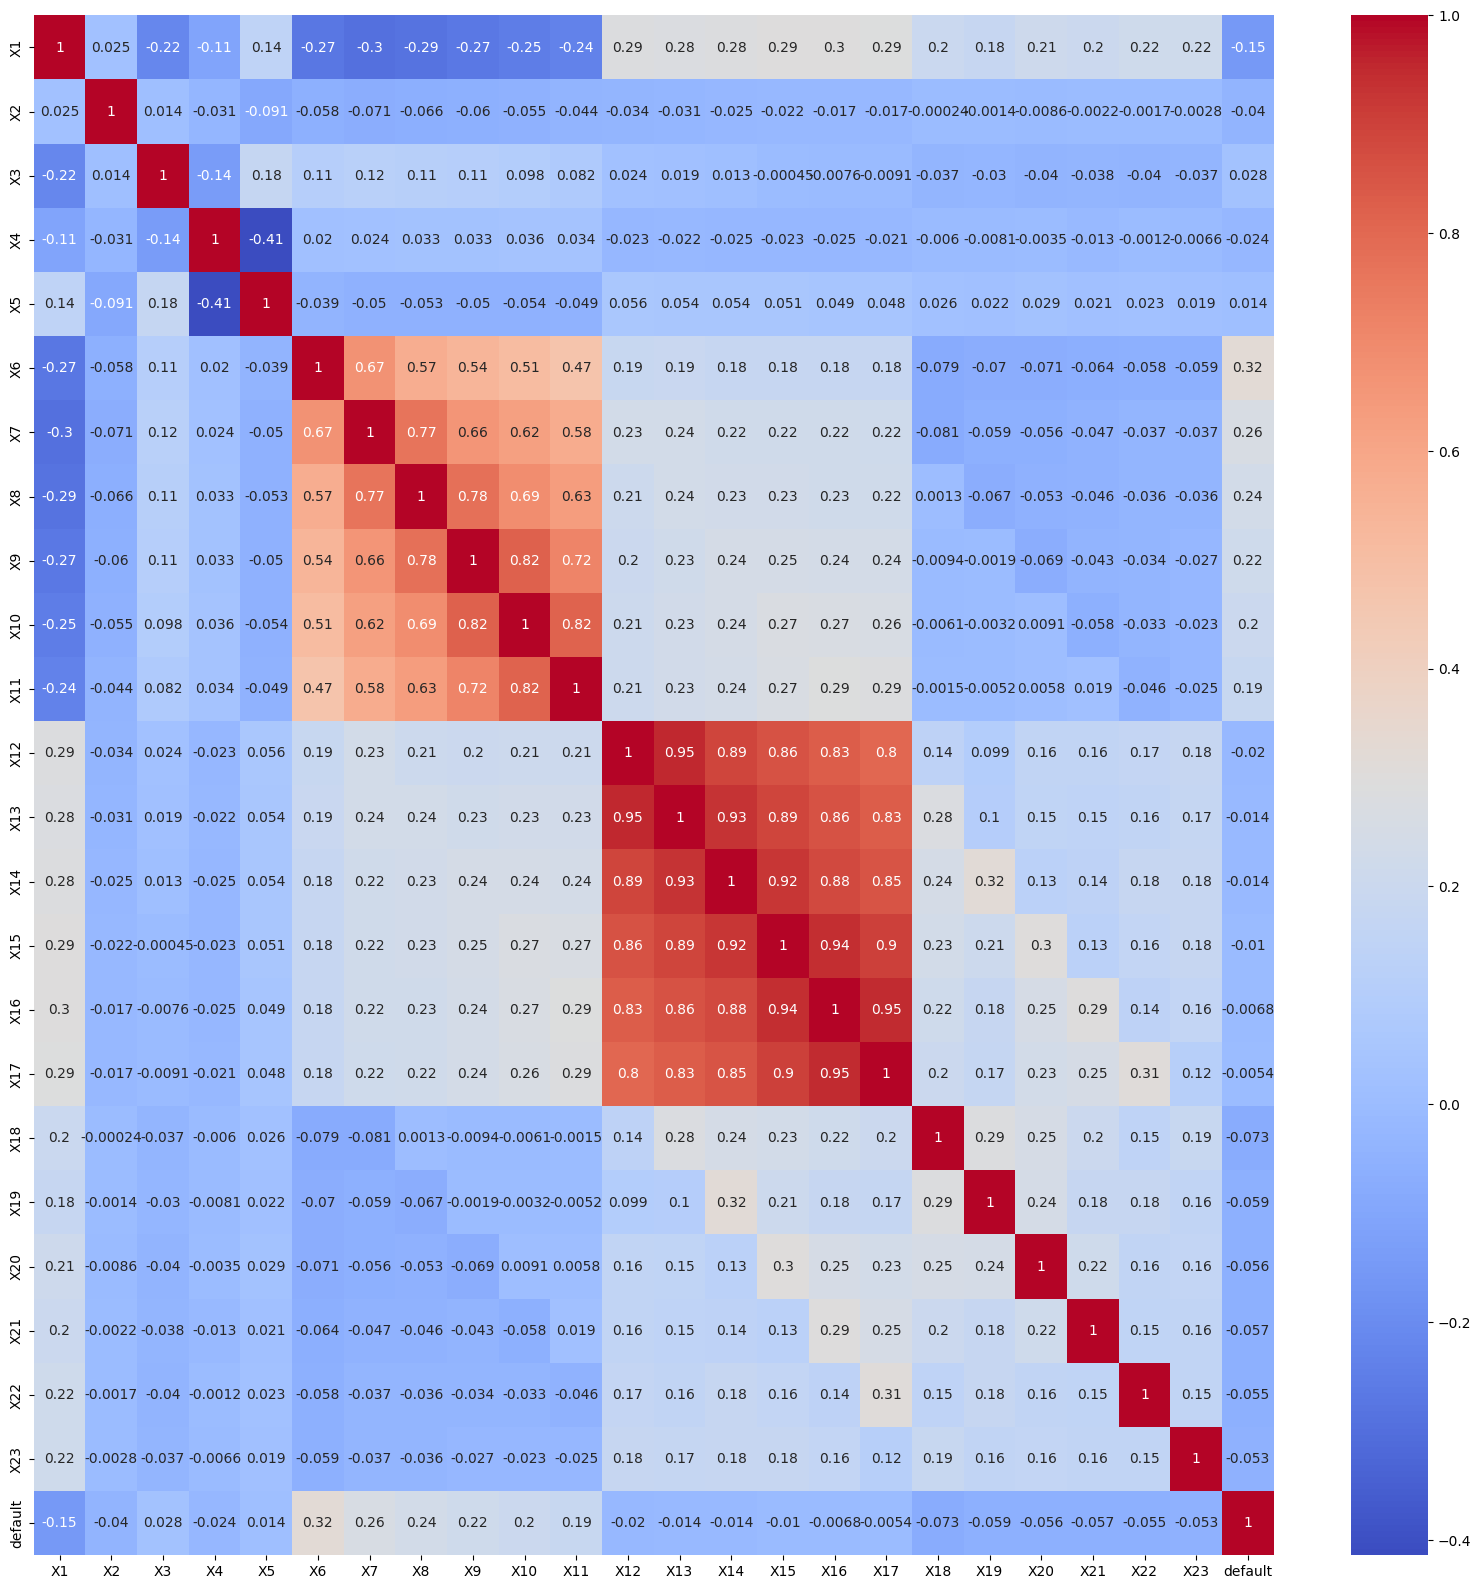

In [62]:
plt.figure(figsize=(20, 20))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

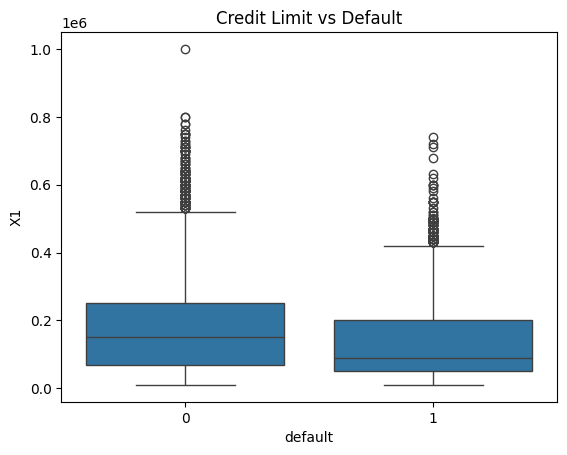

In [63]:
sns.boxplot(x='default', y='X1', data=df)
plt.title("Credit Limit vs Default")
plt.show()

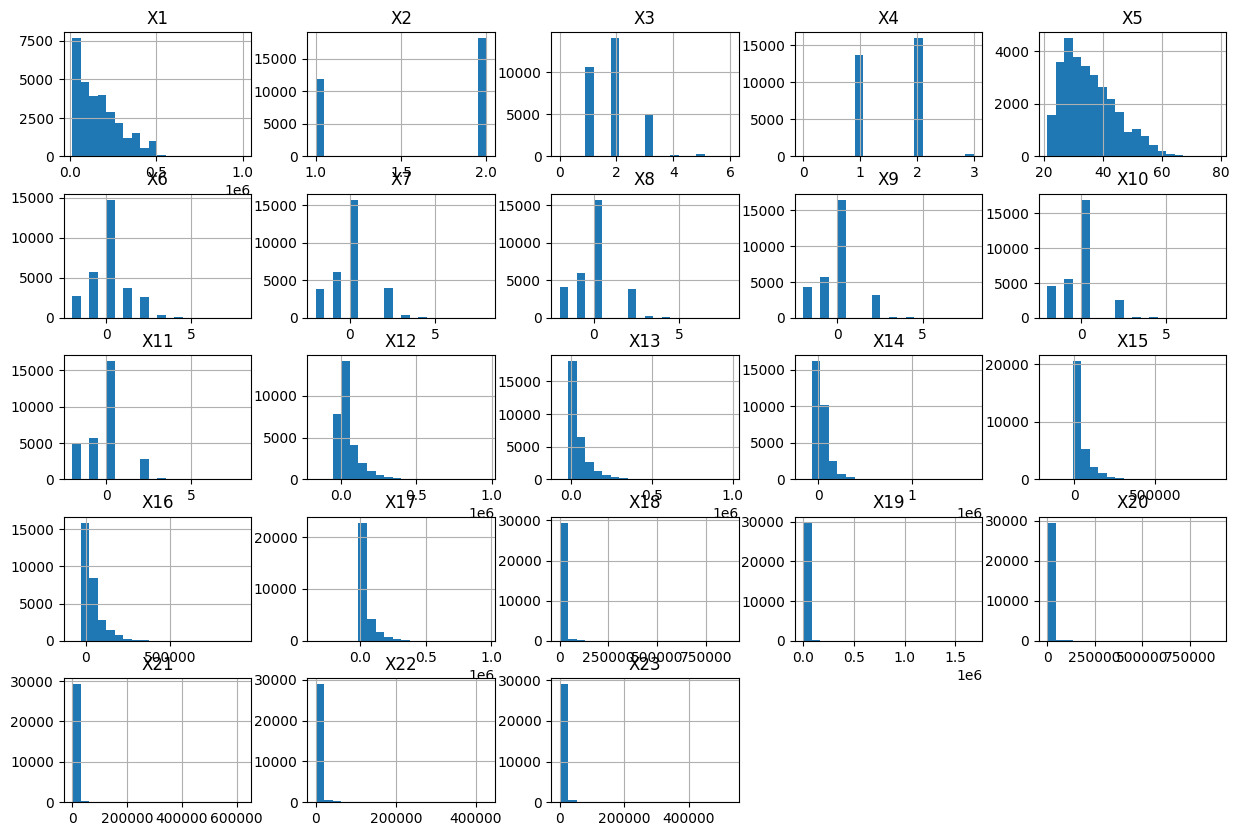

In [65]:
X.hist(bins=20, figsize=(15,10))
plt.show()

## ANALYSING CATEGORICAL VARIABLES

In [66]:
# Map metadata names to actual column names
categorical_cols_map = {
    'SEX': 'X2',
    'EDUCATION': 'X3',
    'MARRIAGE': 'X4'
}

# Print value counts for each categorical column
for col_name, col_code in categorical_cols_map.items():
    print(f"\n{col_name} value counts:\n{X[col_code].value_counts()}")


SEX value counts:
X2
2    18112
1    11888
Name: count, dtype: int64

EDUCATION value counts:
X3
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

MARRIAGE value counts:
X4
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [68]:
def map_education(val):
    if val == 1:
        return 'Graduate School'
    elif val == 2:
        return 'University'
    elif val == 3:
        return 'High School'
    else:
        return 'Others'

df['X3'] = df['X3'].apply(map_education)

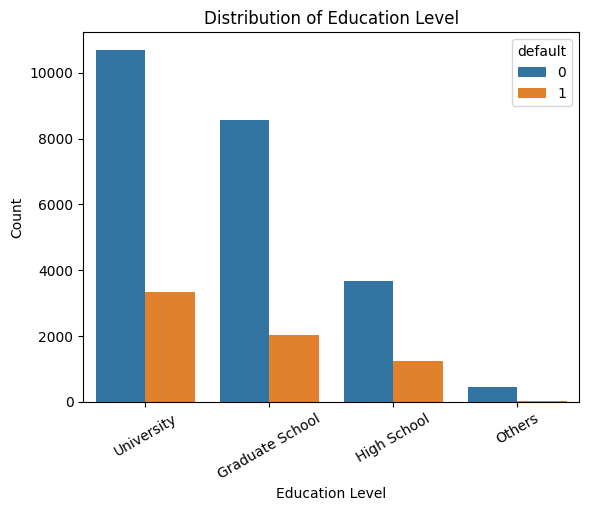

In [69]:
sns.countplot(x=df['X3'],hue=df['default'])
plt.xticks(rotation=30)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Level')
plt.show()

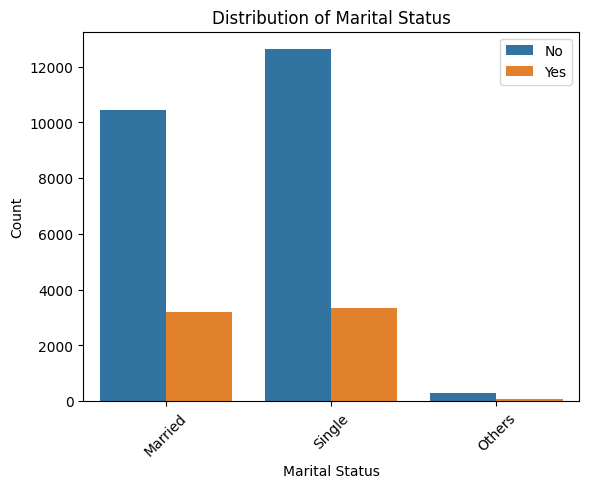

In [70]:
def map_marital(val):
  if val==1:
    return "Married"
  if val==2:
    return "Single"
  else:
    return "Others"
df['X4']=df['X4'].apply(map_marital)
sns.countplot(x=df['X4'],hue=df['default'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.xticks(rotation=45)
plt.legend(['No','Yes'])
plt.show()

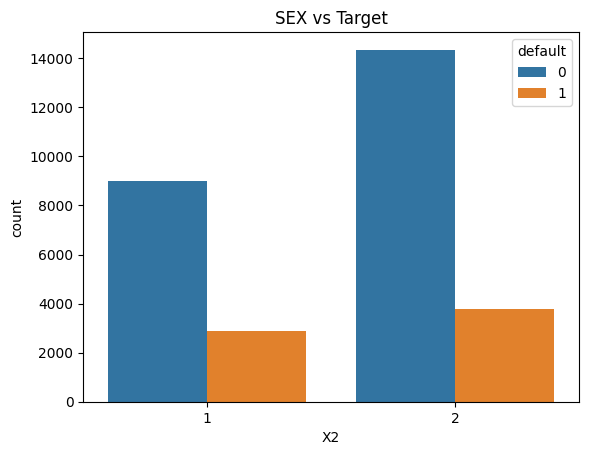

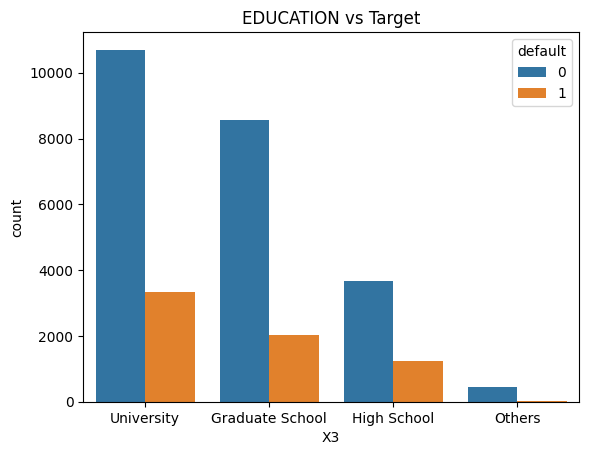

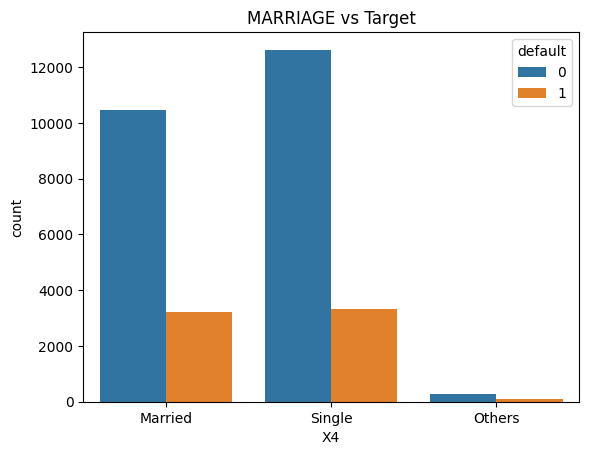

In [71]:
for col_name, col in categorical_cols_map.items():
  sns.countplot(x=col,hue=df['default'],data=df)
  plt.title(f"{col_name} vs Target")
  plt.show()

# CONCLUSION OF EDA

### 1. Dataset Overview
- The dataset contains information about **30,000 credit card clients** in Taiwan.  
- The target variable **"default"** indicates whether a client defaulted (1 = Yes, 0 = No).  
- There are **23 features**, including demographic details, credit history, bill amounts, and payment records.

---

### 2. Target Variable Distribution
- Around **77.9%** of clients did **not default**.  
- About **22.1%** of clients **defaulted**, showing a **class imbalance** (important for modeling).


### 3. Gender (SEX)
- **Females** form the majority of the dataset.  
- **Default rates** are slightly **higher among males** compared to females.



### 4. Education (EDUCATION)
- Most clients fall under **Education level 2 (University)** followed by **level 1 (Graduate school)**.  
- A few values like **0, 4, 5, 6** indicate inconsistent or unrecognized categories — they should ideally be grouped under “Others.”  
- **Default rates** are slightly higher for those with **lower education levels.**


### 5. Marital Status (MARRIAGE)
- Majority are **Single (2)** or **Married (1)**.  
- A few entries are **Others (3 or 0)**.  
- **Single clients** show a **slightly higher default tendency** compared to married ones.


### 6. Age (AGE)
- Most clients are aged between **25-40 years.**  
- Younger individuals (<30) tend to have **higher default rates**.


### 7. Limit Balance (CREDIT_LIMIT)
- The credit limit ranges widely from **10,000 to 1,000,000 TWD.**  
- Clients with **lower credit limits** show **higher default rates**.


### 8. Payment History & Bill Amounts
- Clients with a **history of delayed payments (`PAY_1` to `PAY_6`)** show **significantly higher default rates.**  
- **Bill amounts** and **previous payments** vary widely, indicating diverse spending and repayment behaviors.


### 9. Correlation Insights
- Strong correlations observed among **bill amounts** and among **payment amounts** across months.  
- The **target variable** shows moderate correlation with **past payment delays.**



## ✅ Overall Insights
- Default is influenced by a combination of **payment history**, **credit limit**, and **demographics** (age, education, marital status).  
- **Data cleaning** (handling unknown education and marriage codes) is recommended before modeling.



# MODEL BUILDING

## IMPORTING NECESSARY LIBRARIES

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

## DATA CLEANING

In [90]:
df['X3']=df['X3'].replace([4,5,6,0],3)
df['X4']=df['X4'].replace([0,3],3)
print(df['X3'].value_counts())
print(df['X4'].value_counts())

X3
2    4212
1    2968
3    1689
Name: count, dtype: int64
X4
2    4692
1    4049
3     128
Name: count, dtype: int64


## HANDLING OUTLIERS

In [91]:
# Exclude the 4th column by index
columns_except_4 = df.columns.drop(df.columns[1:5])
columns_except_4 = columns_except_4.drop('default')
numeric_cols = df[columns_except_4]
for col in numeric_cols:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [92]:
print(df.isnull().sum())

X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10        0
X11        0
X12        0
X13        0
X14        0
X15        0
X16        0
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
default    0
dtype: int64


### HERE CATEGORICAL VARIABLES ARE ALREADY ENCODED

In [93]:
def map_education(val):
    if val == 'Graduate School':
        return 1
    elif val == 'University':
        return 2
    elif val == 'High School':
        return 3
    else:
        return 0

df['X3'] = df['X3'].apply(map_education)

In [94]:
def map_marital(val):
  if val=="Married":
    return 1
  if val=="Single":
    return 2
  else:
    return 0
df['X4']=df['X4'].apply(map_marital)

## SPLITTING TRAINING AND TESTING DATA

In [95]:
x=df.drop('default', axis=1)
y=df['default']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [96]:
print(y_train.value_counts())
print(y_test.value_counts())

default
0    4234
1    1006
Name: count, dtype: int64
default
0    1059
1     251
Name: count, dtype: int64


## TRAINING AND PREDICTING WITH DIFFERENT MODELS

In [97]:
models={"Logistic Regression": LogisticRegression(max_iter=2000,random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "Decision Tree Classifier": DecisionTreeClassifier(random_state=42)}
score={}
for name,model in models.items():
  pipeline=Pipeline([
  ("scaler", StandardScaler()),
  ("SMOTE", SMOTE(random_state=42)),
  ("model", model)
              ])
  pipeline.fit(X_train,y_train)
  y_pred=pipeline.predict(X_test)
  acc_score=accuracy_score(y_test,y_pred)
  score[name]=acc_score
  print(f"{name} : {acc_score}")
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
print(score)

Logistic Regression : 0.5740458015267176
[[596 463]
 [ 95 156]]
              precision    recall  f1-score   support

           0       0.86      0.56      0.68      1059
           1       0.25      0.62      0.36       251

    accuracy                           0.57      1310
   macro avg       0.56      0.59      0.52      1310
weighted avg       0.75      0.57      0.62      1310

RandomForestClassifier : 0.750381679389313
[[925 134]
 [193  58]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1059
           1       0.30      0.23      0.26       251

    accuracy                           0.75      1310
   macro avg       0.56      0.55      0.56      1310
weighted avg       0.73      0.75      0.74      1310

Decision Tree Classifier : 0.666412213740458
[[787 272]
 [165  86]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1059
           1       0.24      0.34      

## COMPARING THE MODEL PERFORMANCES

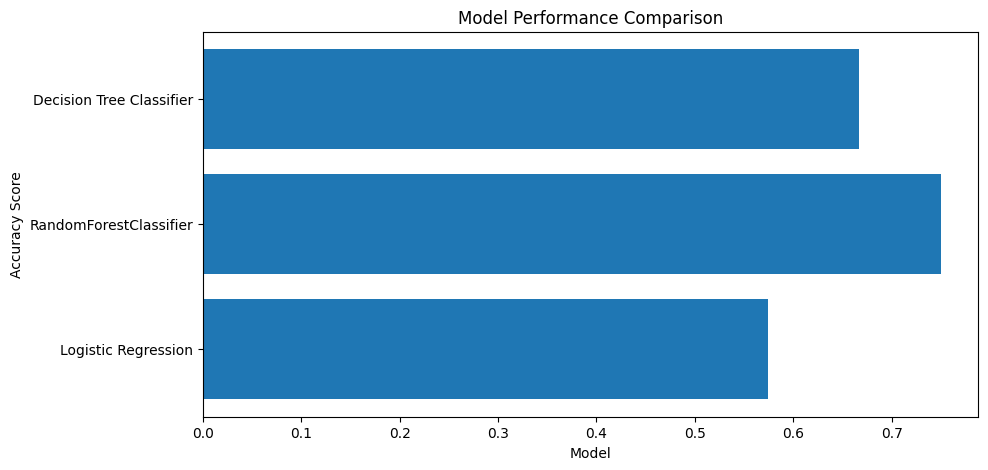

In [106]:
plt.figure(figsize=(10,5))
plt.barh(score.keys(),score.values())
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.show()

# CONCLUSION OF ML

The objective of this study was to predict the **default risk** of credit card clients using various machine learning models.  
After performing **data cleaning**, **outlier handling**, and **class imbalance correction (via SMOTE)**, three models were trained and evaluated —  
**Logistic Regression**, **Decision Tree Classifier**, and **Random Forest Classifier**.

---

### 1. Model Comparison Summary

| Model | Accuracy | Minority (Default) Recall | Minority Precision | Key Observation |
|:--|:--:|:--:|:--:|:--|
| **Logistic Regression** | 0.57 | 0.62 | 0.25 | Better recall — identifies more defaults but with false positives. |
| **Decision Tree Classifier** | 0.67 | 0.34 | 0.24 | Moderate results; interpretable but prone to overfitting. |
| **Random Forest Classifier** | 0.75 | 0.23 | 0.30 | Balanced and stable performance across both classes. |

---

### 2. Key Insights

- **Random Forest** achieved the **highest overall accuracy (≈75%)**, showing strong generalization and robustness.  
- **Logistic Regression** performed well in identifying defaults (higher recall) but suffered from lower precision, leading to more false positives.  
- **Decision Tree** produced moderate results and is useful for interpretability but not optimal for predictive accuracy.  
- Applying **SMOTE** improved the recall for the minority class (defaulters) but slightly reduced overall accuracy — a common trade-off in imbalanced classification.

---

### 3. Final Model Choice

The **Random Forest Classifier** was selected as the **final model** due to:
- Strong predictive accuracy and generalization capability,  
- Ability to handle non-linear relationships,  
- Resistance to noise and overfitting,  
- Balanced trade-off between recall and precision.

---

### 4. Future Enhancements

To further improve model performance:
- Perform **hyperparameter tuning** using `GridSearchCV` or `RandomizedSearchCV`.  
- Experiment with **XGBoost** or **LightGBM** for better recall on the minority class.  
- Apply **feature selection** or **dimensionality reduction (PCA)** to remove noise.  
- Explore **cost-sensitive learning** or gather more balanced data.

---

### ✅ Final Statement

The developed ML pipeline successfully predicted **credit card default risk** and provided insights into payment and behavioral patterns.  
Overall, **ensemble-based models like Random Forest** proved to be effective for real-world financial risk analysis — enabling more reliable, data-driven lending decisions.